In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [50]:
warnings.filterwarnings('ignore')  # In case there's any warning

sns.set_style('white')

### Exploratory Data Analysis

In [51]:
movie_info = pd.read_csv('Datasets/u.data', sep = '\t', header = None )

movie_info.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### Adding Legit coulmn names
As 0, 1, 2, 3 as column name makes no sense

In [52]:

columns_name = ['User_ID', 'Item_ID', 'Rating', 'Timestamp']

movie_info.columns = columns_name  #Explicitly defining column names

In [53]:

movie_info.head(5)


,User_ID,Item_ID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [54]:

movie_info.shape


(100000, 4)

In [55]:
# How many unique users are there?

movie_info.User_ID.nunique()


943

In [56]:
# Dataset holding Movie's name

movie_titles = pd.read_csv("Datasets/u.item", sep = '\|', header  = None)


In [57]:

movie_titles.head(5)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
# Amid of so many columns we are only required Item_ID & Titles i.e. 0 & 1

movie_titles = movie_titles[[0, 1]] #Item_ID, Title 
movie_titles.head(5)


,0,1
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Adding Legit column names to movie_titles

In [59]:

movie_titles.columns = ['Item_ID', 'Title']
movie_titles.head(5)


,Item_ID,Title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


#### Combining movie_info and movie_titles

In [60]:

Movies = pd.merge(movie_info, movie_titles, on = 'Item_ID')

Movies.head()


,User_ID,Item_ID,Rating,Timestamp,Title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


#### Average Rating of each Movie

In [82]:

Avg_Rating = pd.DataFrame(Movies.groupby('Title').mean()['Rating'])
Avg_Rating.head()


,Rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [61]:
# Arranging Rating in Descending order

Avg_Rating.sort_values(by = 'Rating', ascending = False, inplace = True)
Avg_Rating.head(5)


,Rating
Title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [62]:
# Counting number of Ratings for each movie

Count_Rating = pd.DataFrame(Movies.groupby('Title').count()['Rating'])
Count_Rating.head()


,Rating
Title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [67]:
# Reversing the order

Count_Rating.sort_values(by = 'Rating', ascending = False, inplace = True)
Count_Rating.head()


,Rating
Title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


### Column name Rating should be replaced by Count 

In [85]:

Count_Rating.rename(columns = {'Rating' : 'Count'}, inplace = True)
Count_Rating.head()


,Count
Title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [86]:
Avg_Rating.head()

,Rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#### Combining Count_Rating and Number of Avg_Rating

In [87]:
pd.merge(Avg_Rating, Count_Rating, on = 'Title').head()

,Rating,Count
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [90]:

Data = pd.merge(Avg_Rating, Count_Rating, on = 'Title')
Data.head()


,Rating,Count
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Rating    1664
Count     1664
dtype: int64

### Data Visualization

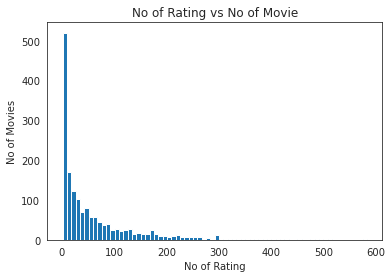

In [100]:

plt.hist(Data['Count'], bins = 70)
plt.ylabel("No of Movies")
plt.xlabel("No of Rating")
plt.title("No of Rating vs No of Movie")
plt.show()


No handles with labels found to put in legend.


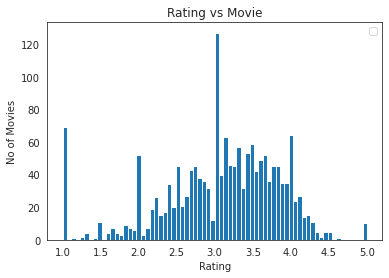

In [102]:

plt.hist(Data['Rating'], bins = 70)
plt.xlabel("Rating")
plt.ylabel("No of Movies")
plt.title("Rating vs Movie")
plt.show()


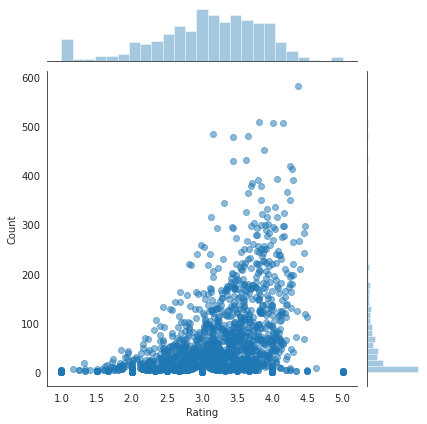

In [103]:
sns.jointplot(x = 'Rating', y = 'Count', data = Data, alpha = 0.5);